In [2]:
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt

In [3]:
start_date = "2025-08-10"
end_date = "2025-08-14"

In [4]:
def get_google_analytics_data(start_date,end_date):
    url="https://n8n.syedd.com/webhook/6e03de77-7003-4900-9a9c-03cfd1f85608"
    body={
        "start_date":start_date,
        "end_date":end_date
    }
    try:
        res = requests.post(url,json=body,headers={"Content-Type":"application/json"})
        res.raise_for_status()  
        # Check if response is empty
        if not res.text.strip():
            print(f"Warning: Empty response from Google Analytics API for dates {start_date} to {end_date}")
            return []
        
        return res.json()
    except requests.exceptions.RequestException as e:
        print(f"Error making request to Google Analytics API: {e}")
        return []
    except ValueError as e:
        print(f"Error parsing JSON from Google Analytics API response: {e}")
        print(f"Response text: {res.text}")
        return []

In [5]:
ga_data = get_google_analytics_data(start_date,end_date)
ga_df = pd.DataFrame(ga_data) if ga_data else pd.DataFrame()

In [6]:
print(ga_df.describe())
print(ga_df.info())

            date pagePath sessionSourceMedium deviceCategory       city  \
count        464      464                 464            464        464   
unique         5       14                  33              3        195   
top     20250809        /  instagram / social         mobile  (not set)   
freq         118      226                 104            267         41   

               country browser sessionManualAdContent continent  \
count              464     464                    464       464   
unique              50       8                     60         6   
top     United Kingdom  Chrome              (not set)    Europe   
freq                84     259                    132       157   

       screenPageViews activeUsers sessions averageSessionDuration bounceRate  \
count              464         464      464                    464        464   
unique               7           4        4                    434          5   
top                  1           1        1  

In [7]:
ga_df["screenPageViews"] = ga_df["screenPageViews"].astype(int)
ga_df["averageSessionDuration"] = ga_df["averageSessionDuration"].astype(float)
ga_df["userEngagementDuration"] = ga_df["userEngagementDuration"].astype(float)
ga_df["bounceRate"] = ga_df["bounceRate"].astype(float)
ga_df["sessions"] = ga_df["sessions"].astype(float)
ga_df["totalUsers"] = ga_df["totalUsers"].astype(int)
ga_df["scrolledUsers"] = ga_df["scrolledUsers"].astype(int)
ga_df["activeUsers"] = ga_df["activeUsers"].astype(int)

In [8]:
#convert date to date_time
ga_df["date"] = pd.to_datetime(ga_df["date"])
ga_df = ga_df.sort_values(by="date")
print(ga_df["date"])
ga_df["day_of_week"] = ga_df["date"].dt.day_name()
print(ga_df["day_of_week"])


131   2025-08-09
111   2025-08-09
112   2025-08-09
113   2025-08-09
114   2025-08-09
         ...    
402   2025-08-13
401   2025-08-13
400   2025-08-13
409   2025-08-13
463   2025-08-13
Name: date, Length: 464, dtype: datetime64[ns]
131     Saturday
111     Saturday
112     Saturday
113     Saturday
114     Saturday
         ...    
402    Wednesday
401    Wednesday
400    Wednesday
409    Wednesday
463    Wednesday
Name: day_of_week, Length: 464, dtype: object


In [9]:
#explorining different sources
split = ga_df["sessionSourceMedium"].str.split("/")
ga_df[['source', 'medium']] = ga_df['sessionSourceMedium'].str.split(' / ', expand=True)

ga_df["ad_content"] = ga_df["sessionManualAdContent"]

ga_df = ga_df.drop(columns=["sessionManualAdContent","sessionSourceMedium"])


In [10]:
print(ga_df.describe())
print(ga_df.info())

                                date  screenPageViews  activeUsers  \
count                            464       464.000000   464.000000   
mean   2025-08-10 19:36:12.413793024         1.237069     0.954741   
min              2025-08-09 00:00:00         0.000000     0.000000   
25%              2025-08-09 00:00:00         1.000000     1.000000   
50%              2025-08-11 00:00:00         1.000000     1.000000   
75%              2025-08-12 00:00:00         1.000000     1.000000   
max              2025-08-13 00:00:00         7.000000     3.000000   
std                              NaN         0.807527     0.322147   

         sessions  averageSessionDuration  bounceRate  userEngagementDuration  \
count  464.000000              464.000000  464.000000              464.000000   
mean     1.116379               89.067971    0.224856               32.778017   
min      1.000000                0.000000    0.000000                0.000000   
25%      1.000000                2.326647    

In [11]:
print(ga_df["pagePath"].value_counts())

pagePath
/                                   226
/lbd                                108
/booking                             55
/opt-in-page                         21
/vsl                                 18
/booking-page-page-360804            12
/thank-you                            6
/live-by-design-new-ghl               5
/time-audit                           4
/live-by-design-new                   3
/v2/preview/BxBWnmW8jW5ju8qiyRxH      3
/burnout-quiz-1579-page               1
/live-by-design-new/                  1
/opt-in-page-659385                   1
Name: count, dtype: int64


date
2025-08-09    156
2025-08-10    112
2025-08-11    114
2025-08-12     95
2025-08-13     97
Name: screenPageViews, dtype: int64


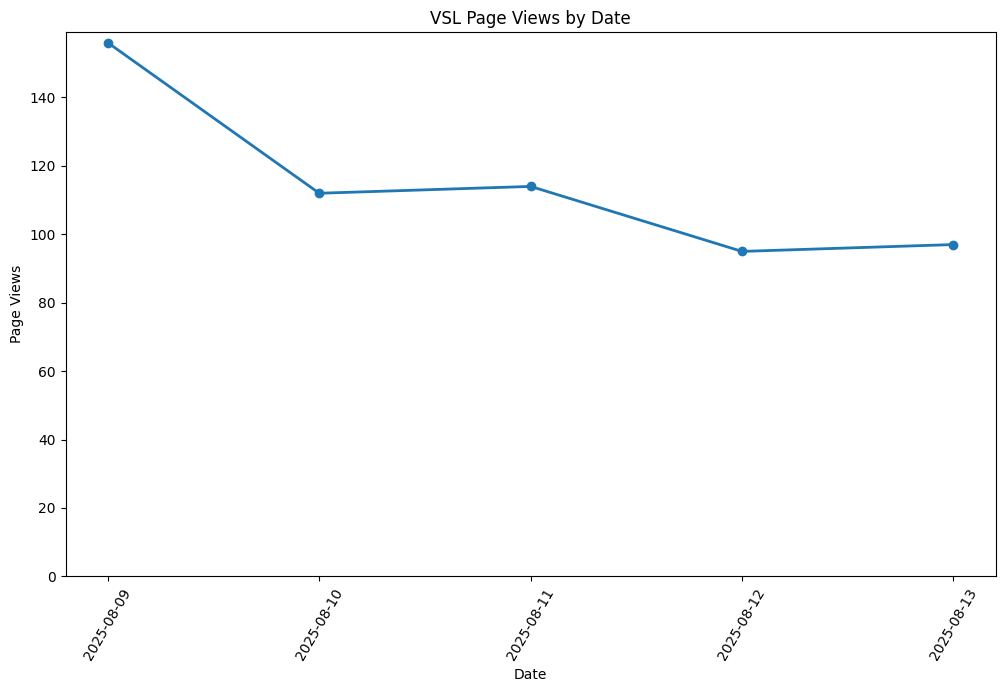

In [12]:
# Group by date only (not datetime)
grouped_by_day = ga_df.groupby(ga_df["date"].dt.date)["screenPageViews"].sum()
print(grouped_by_day)

plt.figure(figsize=(12, 8))

dates = list(grouped_by_day.index)
values = list(grouped_by_day.values)

plt.plot(range(len(dates)), values, marker='o', linewidth=2, markersize=6)

plt.xticks(range(len(dates)), dates, rotation=60)

plt.ylim(bottom=0)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('VSL Page Views by Date')

plt.subplots_adjust(bottom=0.2)

plt.show()

pagePath
/                                   285
/booking                             66
/booking-page-page-360804            20
/burnout-quiz-1579-page               1
/lbd                                128
/live-by-design-new                   1
/live-by-design-new-ghl               8
/live-by-design-new/                  1
/opt-in-page                         29
/opt-in-page-659385                   1
/thank-you                            6
/time-audit                           5
/v2/preview/BxBWnmW8jW5ju8qiyRxH      5
/vsl                                 18
Name: screenPageViews, dtype: int64


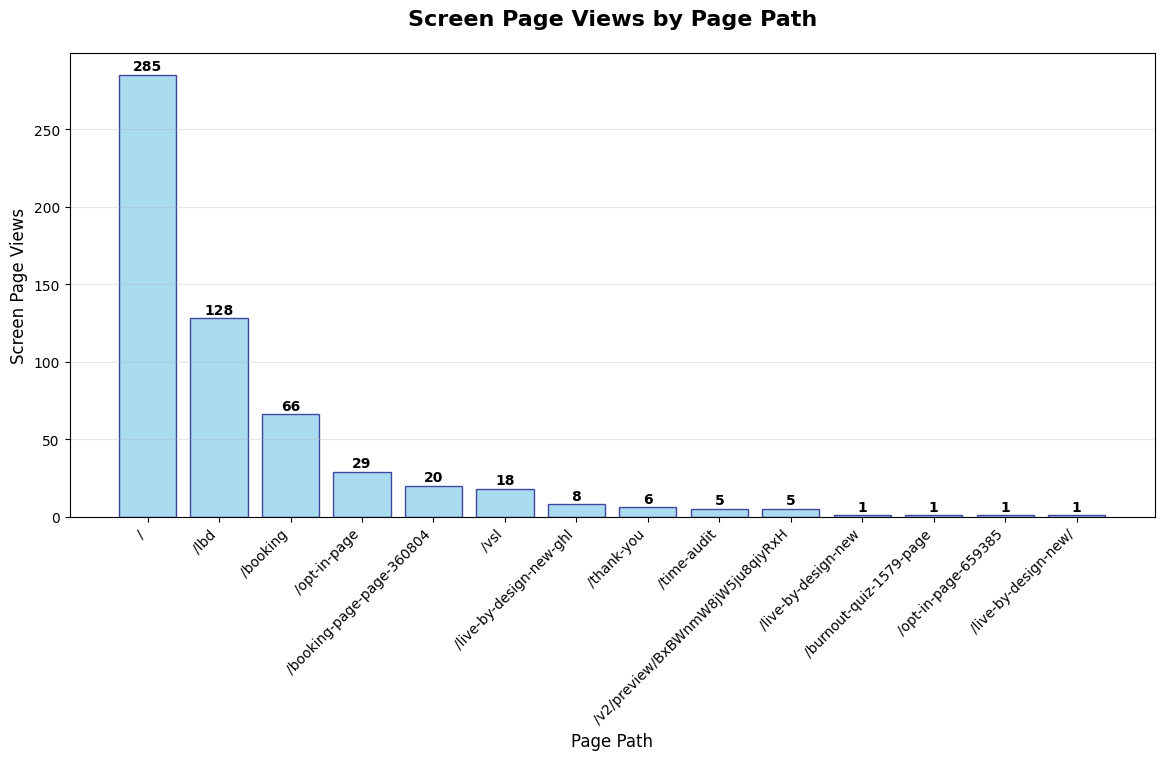

In [13]:
grouped_by_page_views_and_path = ga_df.groupby(["pagePath"])["screenPageViews"].sum()
print(grouped_by_page_views_and_path)

# Create the bar chart
plt.figure(figsize=(14, 8))

sorted_data = grouped_by_page_views_and_path.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Screen Page Views by Page Path', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Page Path', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

plt.xticks(range(len(sorted_data)), sorted_data.index, rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

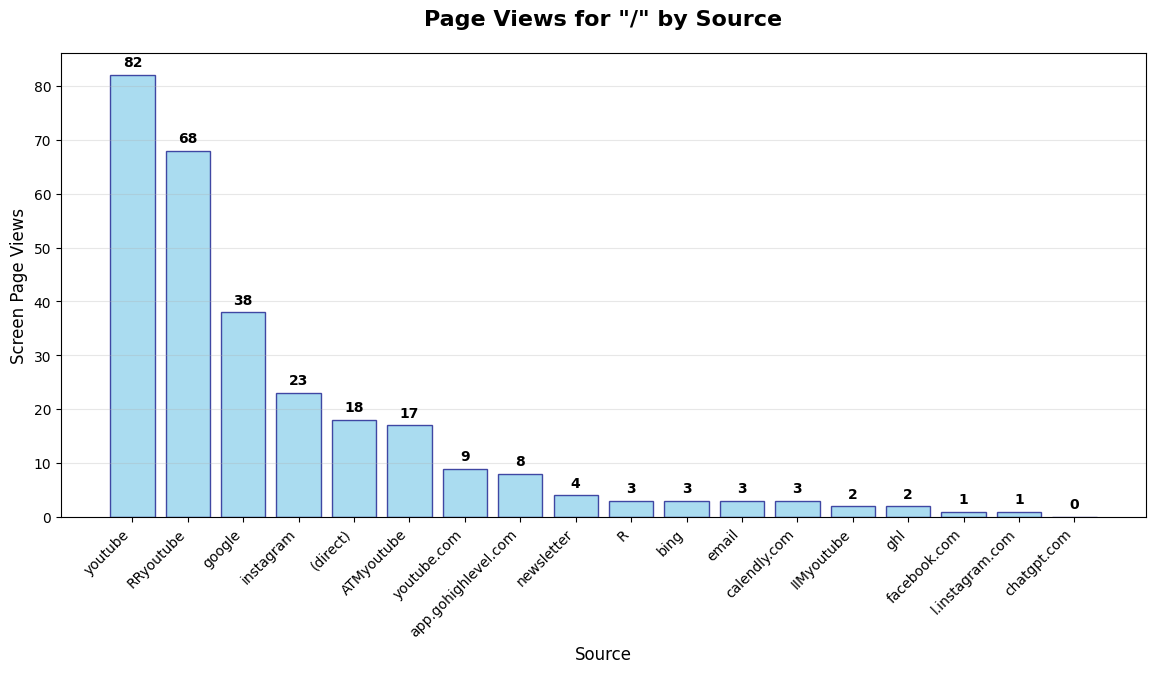

In [14]:
grouped_by_sources = ga_df.groupby(['source',"pagePath"])["screenPageViews"].sum()

plt.figure(figsize=(14, 8))
filtered_data = grouped_by_sources[grouped_by_sources.index.get_level_values('pagePath').isin(['/'])]

sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Page Views for "/" by Source', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

# Extract only the source names for x-axis labels
source_labels = [source for source, page in sorted_data.index]
plt.xticks(range(len(sorted_data)), source_labels, rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

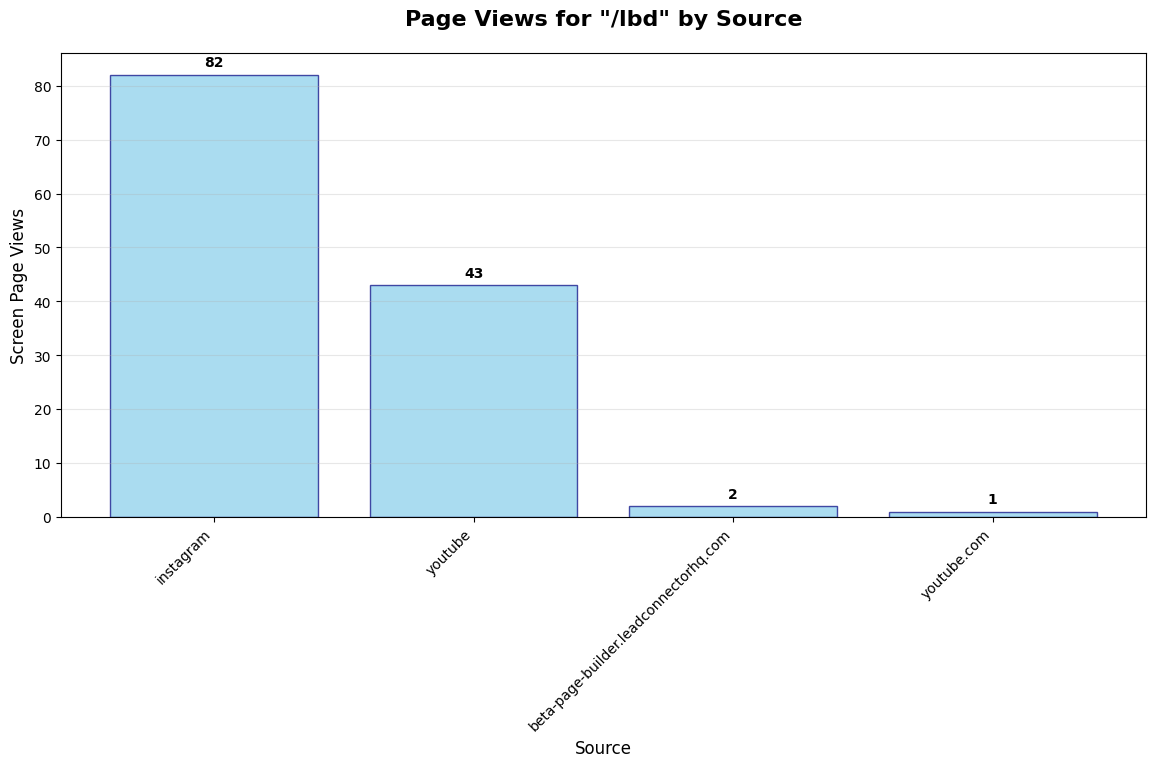

In [15]:
grouped_by_sources = ga_df.groupby(['source',"pagePath"])["screenPageViews"].sum()

plt.figure(figsize=(14, 8))
filtered_data = grouped_by_sources[grouped_by_sources.index.get_level_values('pagePath').isin(['/lbd'])]

sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Page Views for "/lbd" by Source', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

# Extract only the source names for x-axis labels
source_labels = [source for source, page in sorted_data.index]
plt.xticks(range(len(sorted_data)), source_labels, rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

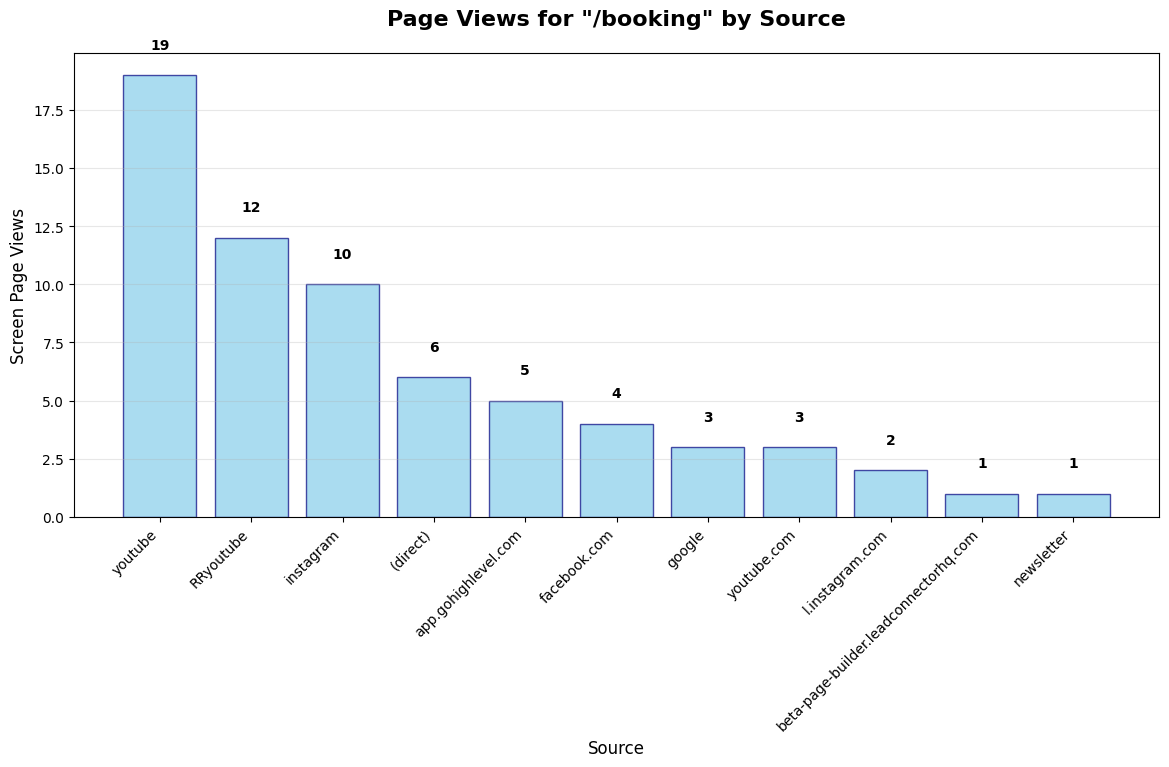

In [16]:
grouped_by_sources = ga_df.groupby(['source',"pagePath"])["screenPageViews"].sum()

plt.figure(figsize=(14, 8))
filtered_data = grouped_by_sources[grouped_by_sources.index.get_level_values('pagePath').isin(['/booking'])]

sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Page Views for "/booking" by Source', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

# Extract only the source names for x-axis labels
source_labels = [source for source, page in sorted_data.index]
plt.xticks(range(len(sorted_data)), source_labels, rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

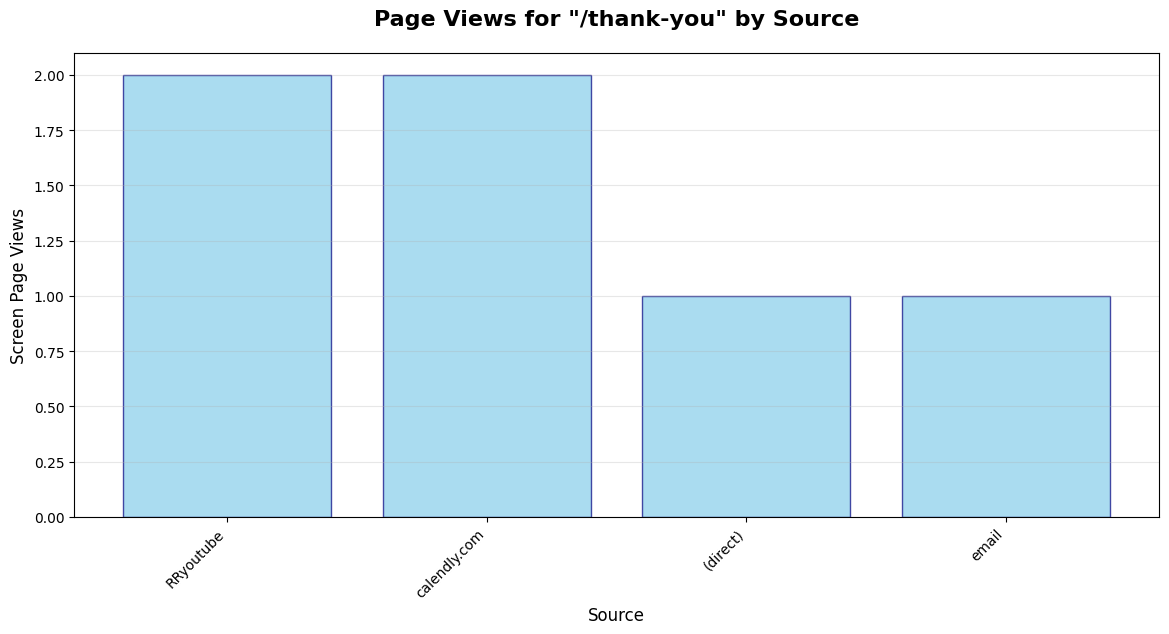

In [17]:
grouped_by_sources = ga_df.groupby(['source',"pagePath"])["screenPageViews"].sum()

plt.figure(figsize=(14, 8))
filtered_data = grouped_by_sources[grouped_by_sources.index.get_level_values('pagePath').isin(['/thank-you'])]

sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Page Views for "/thank-you" by Source', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

# Extract only the source names for x-axis labels
source_labels = [source for source, page in sorted_data.index]
plt.xticks(range(len(sorted_data)), source_labels, rotation=45, ha='right')


# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

pagePath
/             103.706627
/booking       32.382551
/lbd           69.031039
/thank-you    277.709325
Name: averageSessionDuration, dtype: float64


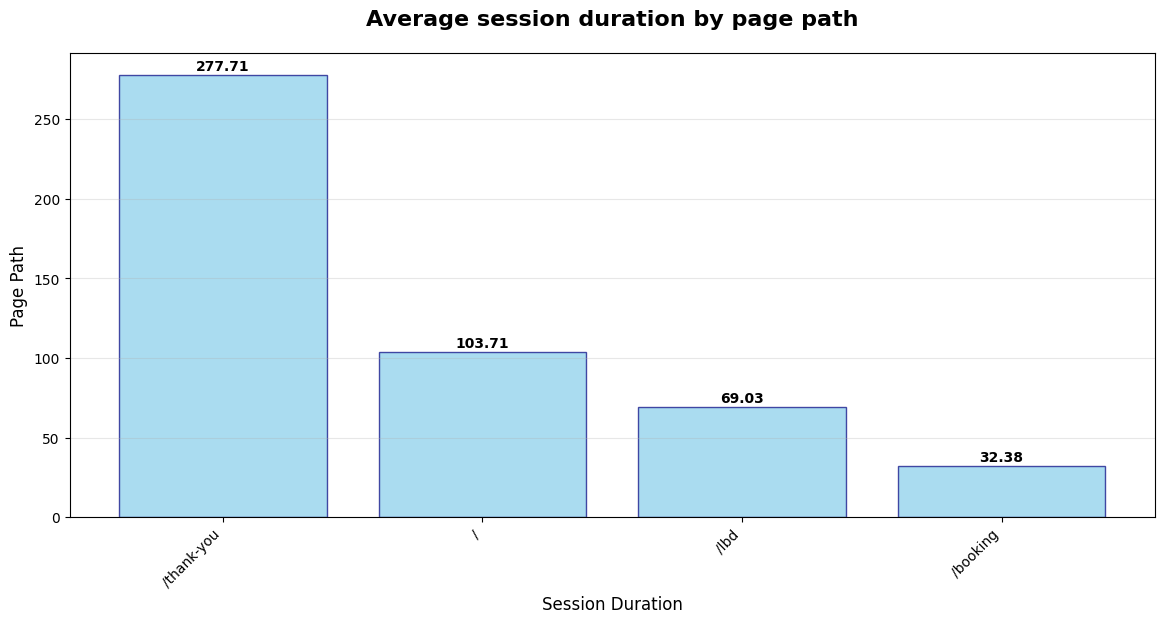

In [31]:
avg_session_duration_by_page_path = ga_df.groupby("pagePath")["averageSessionDuration"].mean()

plt.figure(figsize=(14, 8))
filtered_data = avg_session_duration_by_page_path[avg_session_duration_by_page_path.index.get_level_values('pagePath').isin(['/lbd','/','/booking','/thank-you'])]
print(filtered_data)
sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Average session duration by page path', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Session Duration', fontsize=12)
plt.ylabel('Page Path', fontsize=12)

# Extract only the source names for x-axis labels
plt.xticks(range(len(sorted_data)), sorted_data.index, rotation=45, ha='right')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{float(height):.2f}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()